<a href="https://colab.research.google.com/github/nmohankumar85/Website/blob/master/G_ML_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Challenge:** The task at hand is a binary classification problem, for which both a training and a validation data set are provided as csv files. We would like to explore both data sets, note down key observations along with a short summary / visualization and work on this classification task by building a classifier only with the training data, with the goal of achieving the best performance possible on the validation data. We are allowed to manipulate / remove any independent variables in either data set in any way you see fit to achieve this goal.

In [0]:
# Importing Libraries
import os
from google.colab import drive

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

!pip install missingno
import missingno as msno
import itertools
from IPython.display import display
pd.options.display.max_columns = None

In [0]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#Read training and validation data from csv
train = pd.read_csv('/content/drive/My Drive/Gfk/training.csv', sep=';')
val = pd.read_csv('/content/drive/My Drive/Gfk/validation.csv', sep=';')

In [0]:
#Check the the top 5 rows of data
train.head()

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,classLabel
0,a,"17,92","5,4e-05",u,"-0,840182024985552","0,522882590622095","1,75",f,t,1,t,g,80.0,5,800000.0,t,0,no.
1,b,"16,92","3,35e-05",y,"-2,15963506605476","0,774187133555115","0,29",f,f,0,f,s,200.0,0,2000000.0,NaN,0,no.
2,b,"31,25","0,0001125",u,"1,75068668089807","0,76036270650308",0,f,t,1,f,g,96.0,19,960000.0,t,0,no.
3,a,"48,17","0,0001335",u,"4,17487068567425","0,888963139486792","0,335",f,f,0,f,g,0.0,120,0.0,NaN,0,no.
4,b,"32,33","0,00035",u,"-3,78547915257514","0,489023844085239","0,5",f,f,0,t,g,232.0,0,2320000.0,f,0,no.


In [0]:
#Check the the top 5 rows of data
val.head()

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,classLabel
0,b,"32,33","0,00075",u,"0,840107307","0,544982291","1,585",t,f,0,t,s,420.0,0,4200000,NaN,1,no.
1,b,"23,58","0,000179",u,"-4,174395711","0,864361709","0,54",f,f,0,t,g,136.0,1,1360000,NaN,0,no.
2,b,"36,42","7,50E-05",y,"2,23222567","0,627475551","0,585",f,f,0,f,g,240.0,3,2400000,NaN,1,no.
3,b,"18,42","0,0010415",y,"-2,469969629","0,846741022","0,125",t,f,0,f,g,120.0,375,1200000,NaN,0,no.
4,b,"24,5","0,0013335",y,"-3,149422333","0,321087006","0,04",f,f,0,t,g,120.0,475,1200000,f,1,no.


In [0]:
# Function to treat the tuples in the data set by splitting them as a separate features
def prepare_df(df):
    for col in ['v2','v3','v5','v6','v7']:
        temp_df = df[col].str.split(',').apply(pd.Series, 1)
        temp_df.columns = [col + '_' + str(i) for i in temp_df.columns]
        df = pd.concat([df, temp_df], axis = 1)
        df.drop(col, axis = 1, inplace = True)
    return df

In [0]:
# Treat tuples for train and validation data set
train = prepare_df(train)
val = prepare_df(val)

In [0]:
train.head()

,v1,v4,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,classLabel,v2_0,v2_1,v3_0,v3_1,v5_0,v5_1,v6_0,v6_1,v7_0,v7_1
0,a,u,f,t,1,t,g,80.0,5,800000.0,t,0,no.,17,92,5,4e-05,-0,840182024985552,0,522882590622095,1,75
1,b,y,f,f,0,f,s,200.0,0,2000000.0,NaN,0,no.,16,92,3,35e-05,-2,15963506605476,0,774187133555115,0,29
2,b,u,f,t,1,f,g,96.0,19,960000.0,t,0,no.,31,25,0,0001125,1,75068668089807,0,76036270650308,0,NaN
3,a,u,f,f,0,f,g,0.0,120,0.0,NaN,0,no.,48,17,0,0001335,4,17487068567425,0,888963139486792,0,335
4,b,u,f,f,0,t,g,232.0,0,2320000.0,f,0,no.,32,33,0,00035,-3,78547915257514,0,489023844085239,0,5


In [0]:
# Check the statistical properties of the training data
train.describe(include = 'all')

,v1,v4,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,classLabel,v2_0,v2_1,v3_0,v3_1,v5_0,v5_1,v6_0,v6_1,v7_0,v7_1
count,3661,3636,3700,3700,3700.000000,3700,3700,3600.000000,3700.000000,3.600000e+03,1555,3700.000000,3700,3661,3321,3700,2944,3700,3700,3700,3700,3700,2739
unique,2,3,2,2,NaN,2,3,NaN,NaN,NaN,2,NaN,2,55,11,21,157,10,3700,2,3700,21,23
top,b,u,t,t,NaN,f,g,NaN,NaN,NaN,t,NaN,yes.,23,17,0,75e-05,-3,11042324453592,0,807399942436371,0,5
freq,2382,3055,3171,2239,NaN,1924,3430,NaN,NaN,NaN,1023,NaN,3424,258,478,2556,101,387,1,3513,1,1186,699
mean,NaN,NaN,NaN,NaN,4.160000,NaN,NaN,162.695000,2246.705946,1.626950e+06,NaN,0.925405,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,6.750553,NaN,NaN,156.045682,8708.571126,1.560457e+06,NaN,0.262772,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000000e+00,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000000e+00,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,120.000000,113.000000,1.200000e+06,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,280.000000,1059.750000,2.800000e+06,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
# Checking the datatypes of each features in the training data
train.dtypes

v1             object
v4             object
v8             object
v9             object
v10             int64
v11            object
v12            object
v13           float64
v14             int64
v15           float64
v16            object
v17             int64
classLabel     object
v2_0           object
v2_1           object
v3_0           object
v3_1           object
v5_0           object
v5_1           object
v6_0           object
v6_1           object
v7_0           object
v7_1           object
dtype: object

# E.D.A

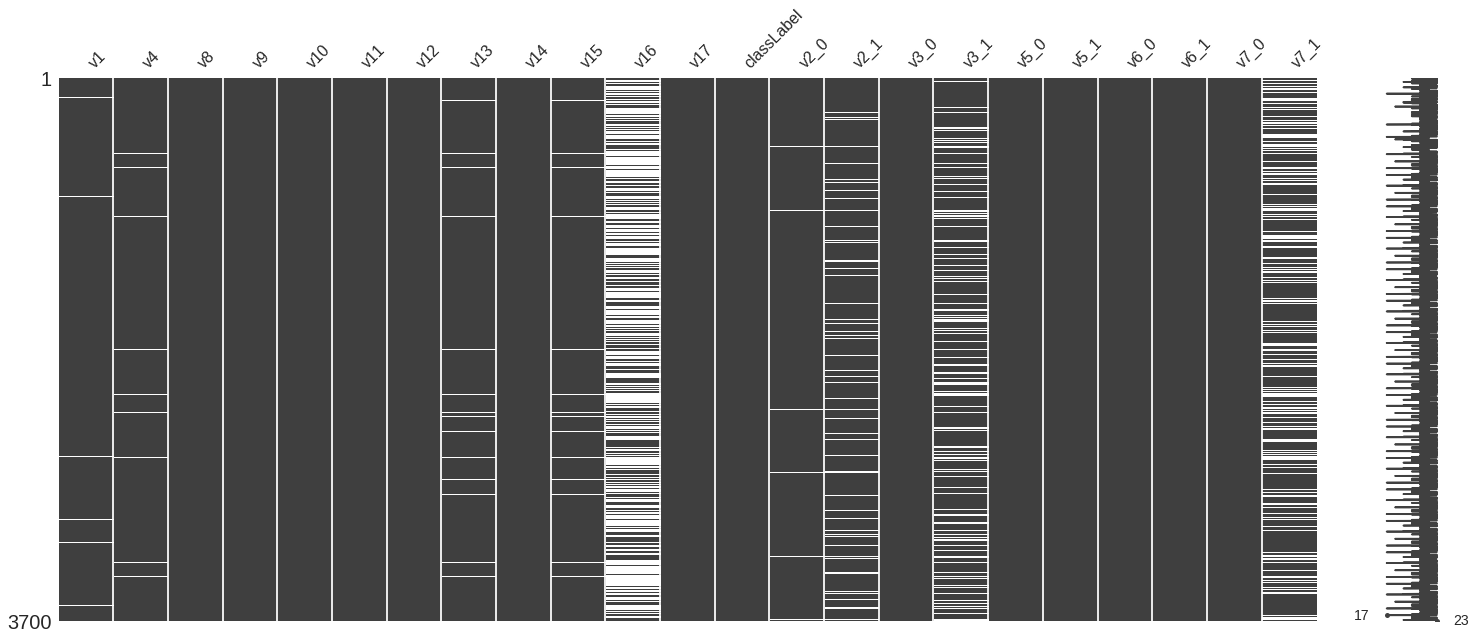

In [0]:
# Visualizing the missing vlues in each feature of a training data
msno.matrix(train)

In [0]:
# Changing data types
def change_dtypes(df):
    for col in ['v1', 'v4', 'v8', 'v9', 'v11', 'v12', 'v16', 'classLabel']:
        df[col] = df[col].astype(object)
    for col in ['v10', 'v14', 'v17', 'v2_0', 'v2_1', 'v5_0', 'v5_1', 'v6_0', "v6_1", 'v7_0', 'v7_1', 'v13', 'v15', 'v3_1', 'v3_0']:
        df[col] = df[col].astype(float)
    return df

In [0]:
# Change datatypes as required and also treat validation feature (v15) for the exponential value
train = change_dtypes(train)
val.v15 = val.v15.astype(str).apply(lambda x: float(x.replace(',','')))
val = change_dtypes(val)

In [0]:
# Function to impute the missing value with mean and mode
def impute_missing(df):
    df['v1'] = df['v1'].replace(np.nan, df.v1.mode()[0])
    df['v4'] = df['v4'].replace(np.nan, df.v4.mode()[0])
    df['v13'] = df['v13'].replace(np.nan, int(df.v13.mean()))
    df['v15'] = df['v15'].replace(np.nan, int(df.v15.mean()))
    df['v16'] = df['v16'].replace(np.nan, 'missing')
    df['v2_0'] = df['v2_0'].replace(np.nan, int(df.v2_0.mean()))
    df['v2_1'] = df['v2_1'].replace(np.nan, int(df.v2_1.mean()))
    df['v3_1'] = df['v3_1'].replace(np.nan, df.v3_1.mean())
    df['v7_1'] = df['v7_1'].replace(np.nan, int(df.v7_1.mean()))
    return df

In [0]:
# Impute the missing value for train and valiation data
train = impute_missing(train)
val = impute_missing(val)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


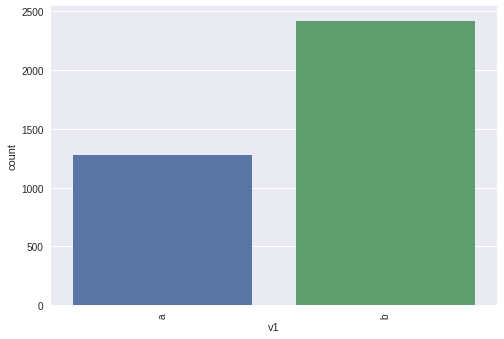

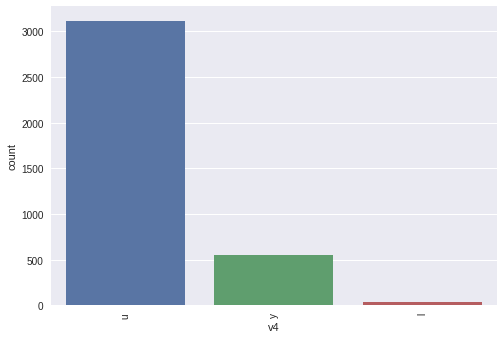

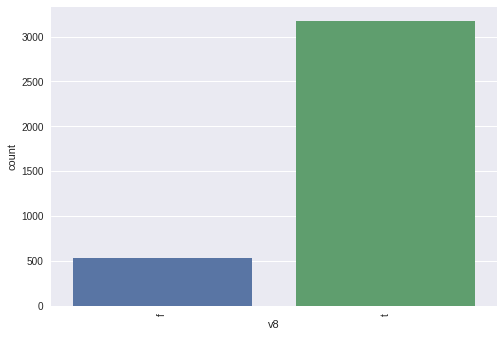

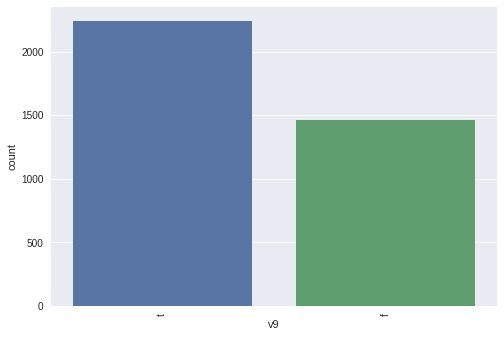

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


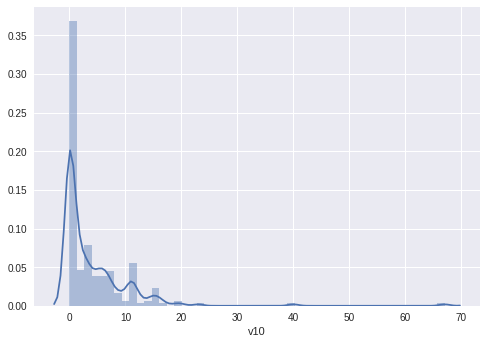

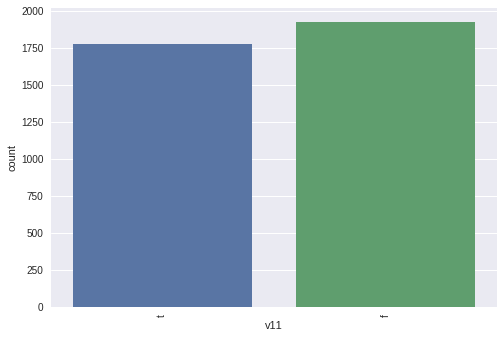

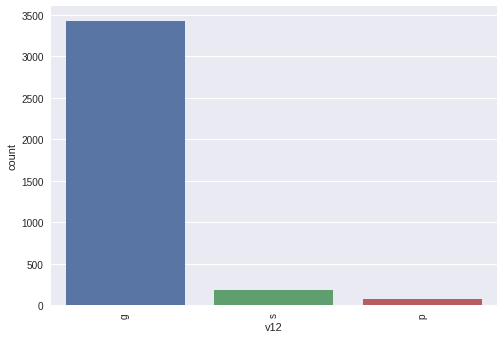

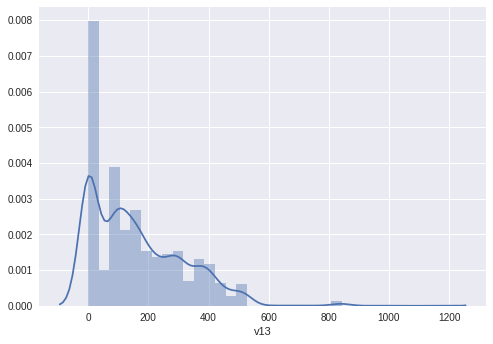

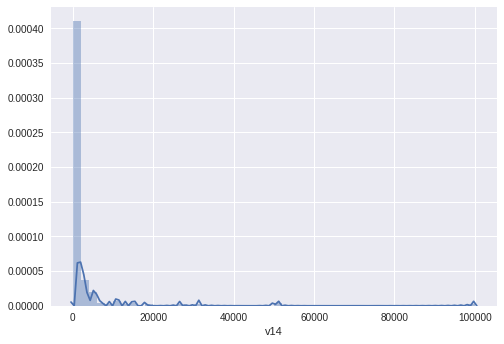

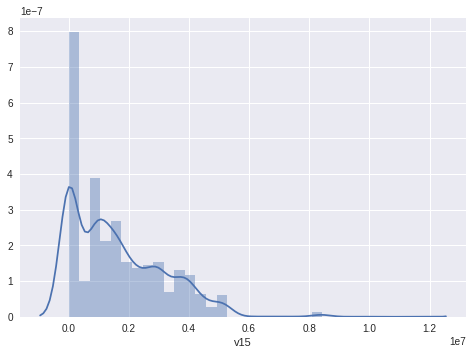

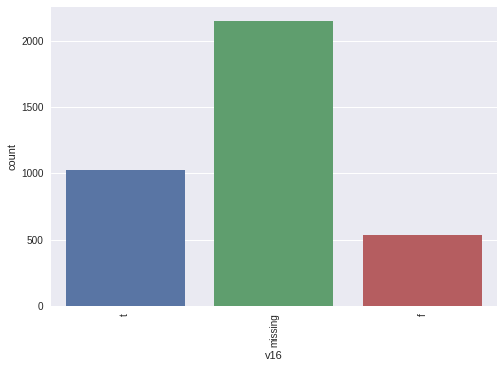

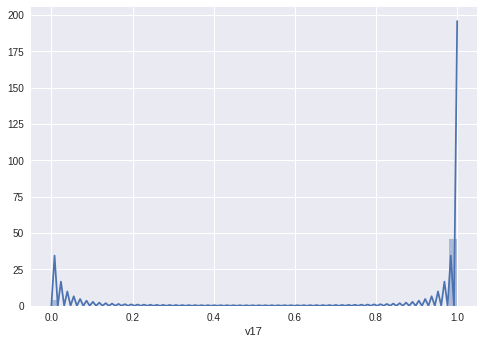

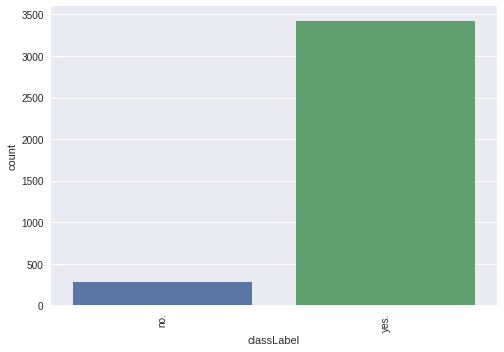

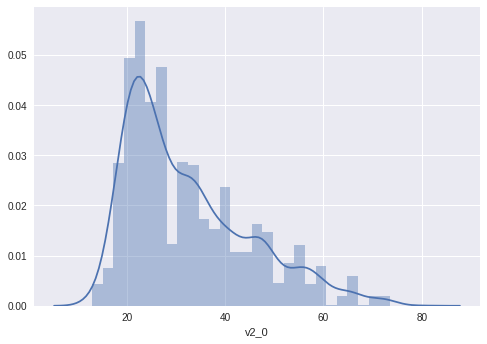

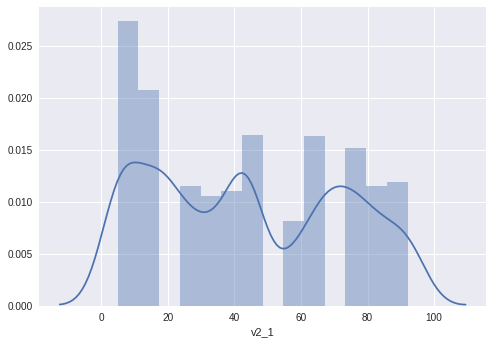

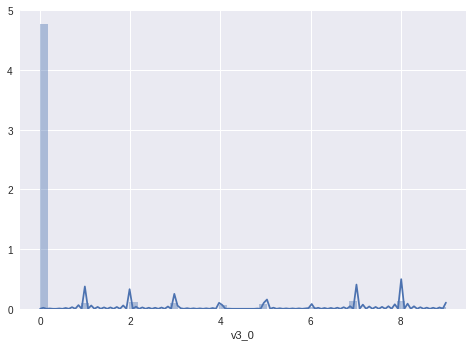

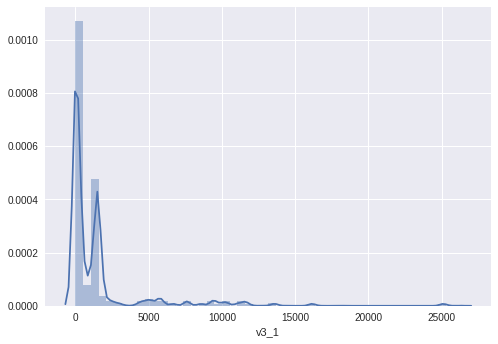

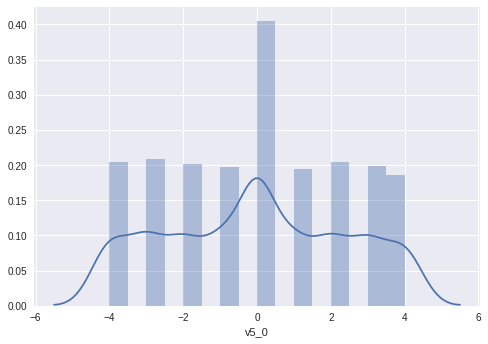

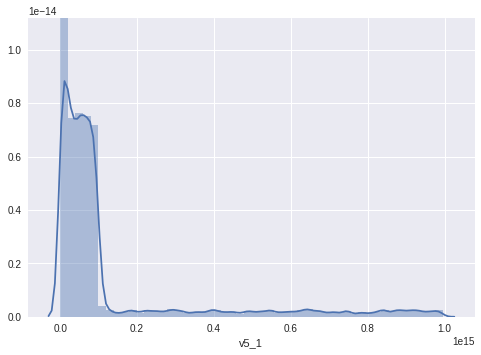

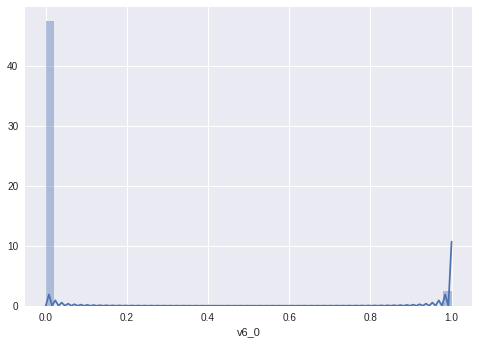

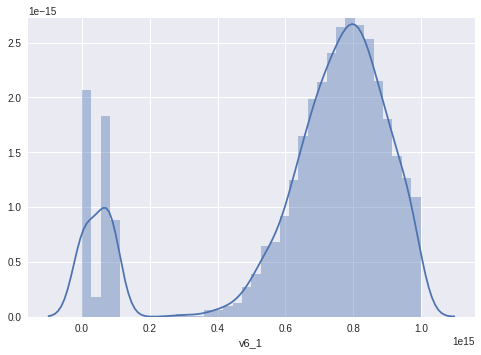

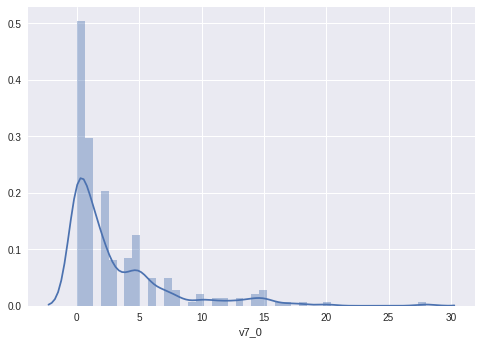

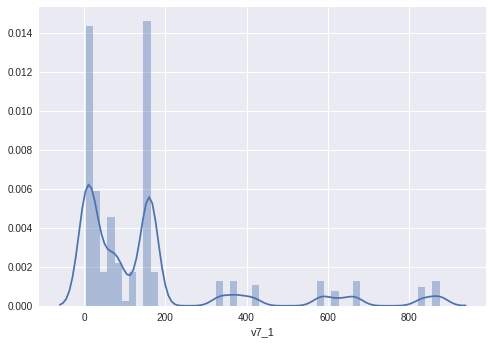

In [0]:
# Univariate analysis for training data
import seaborn as sns
for column in train.columns:
    if train[column].dtype in (['int64','float64']):
        sns.distplot(train[column].dropna(), kde=True)
        plt.show()
    else:
        sns.countplot(train[column] ,palette="deep")
        plt.xticks(rotation = 90)
        plt.show()

In [0]:
#### From the univariate analysis we can observe that most of the features does not follow the normal distribution and the categorical 
# features shows class imbalance


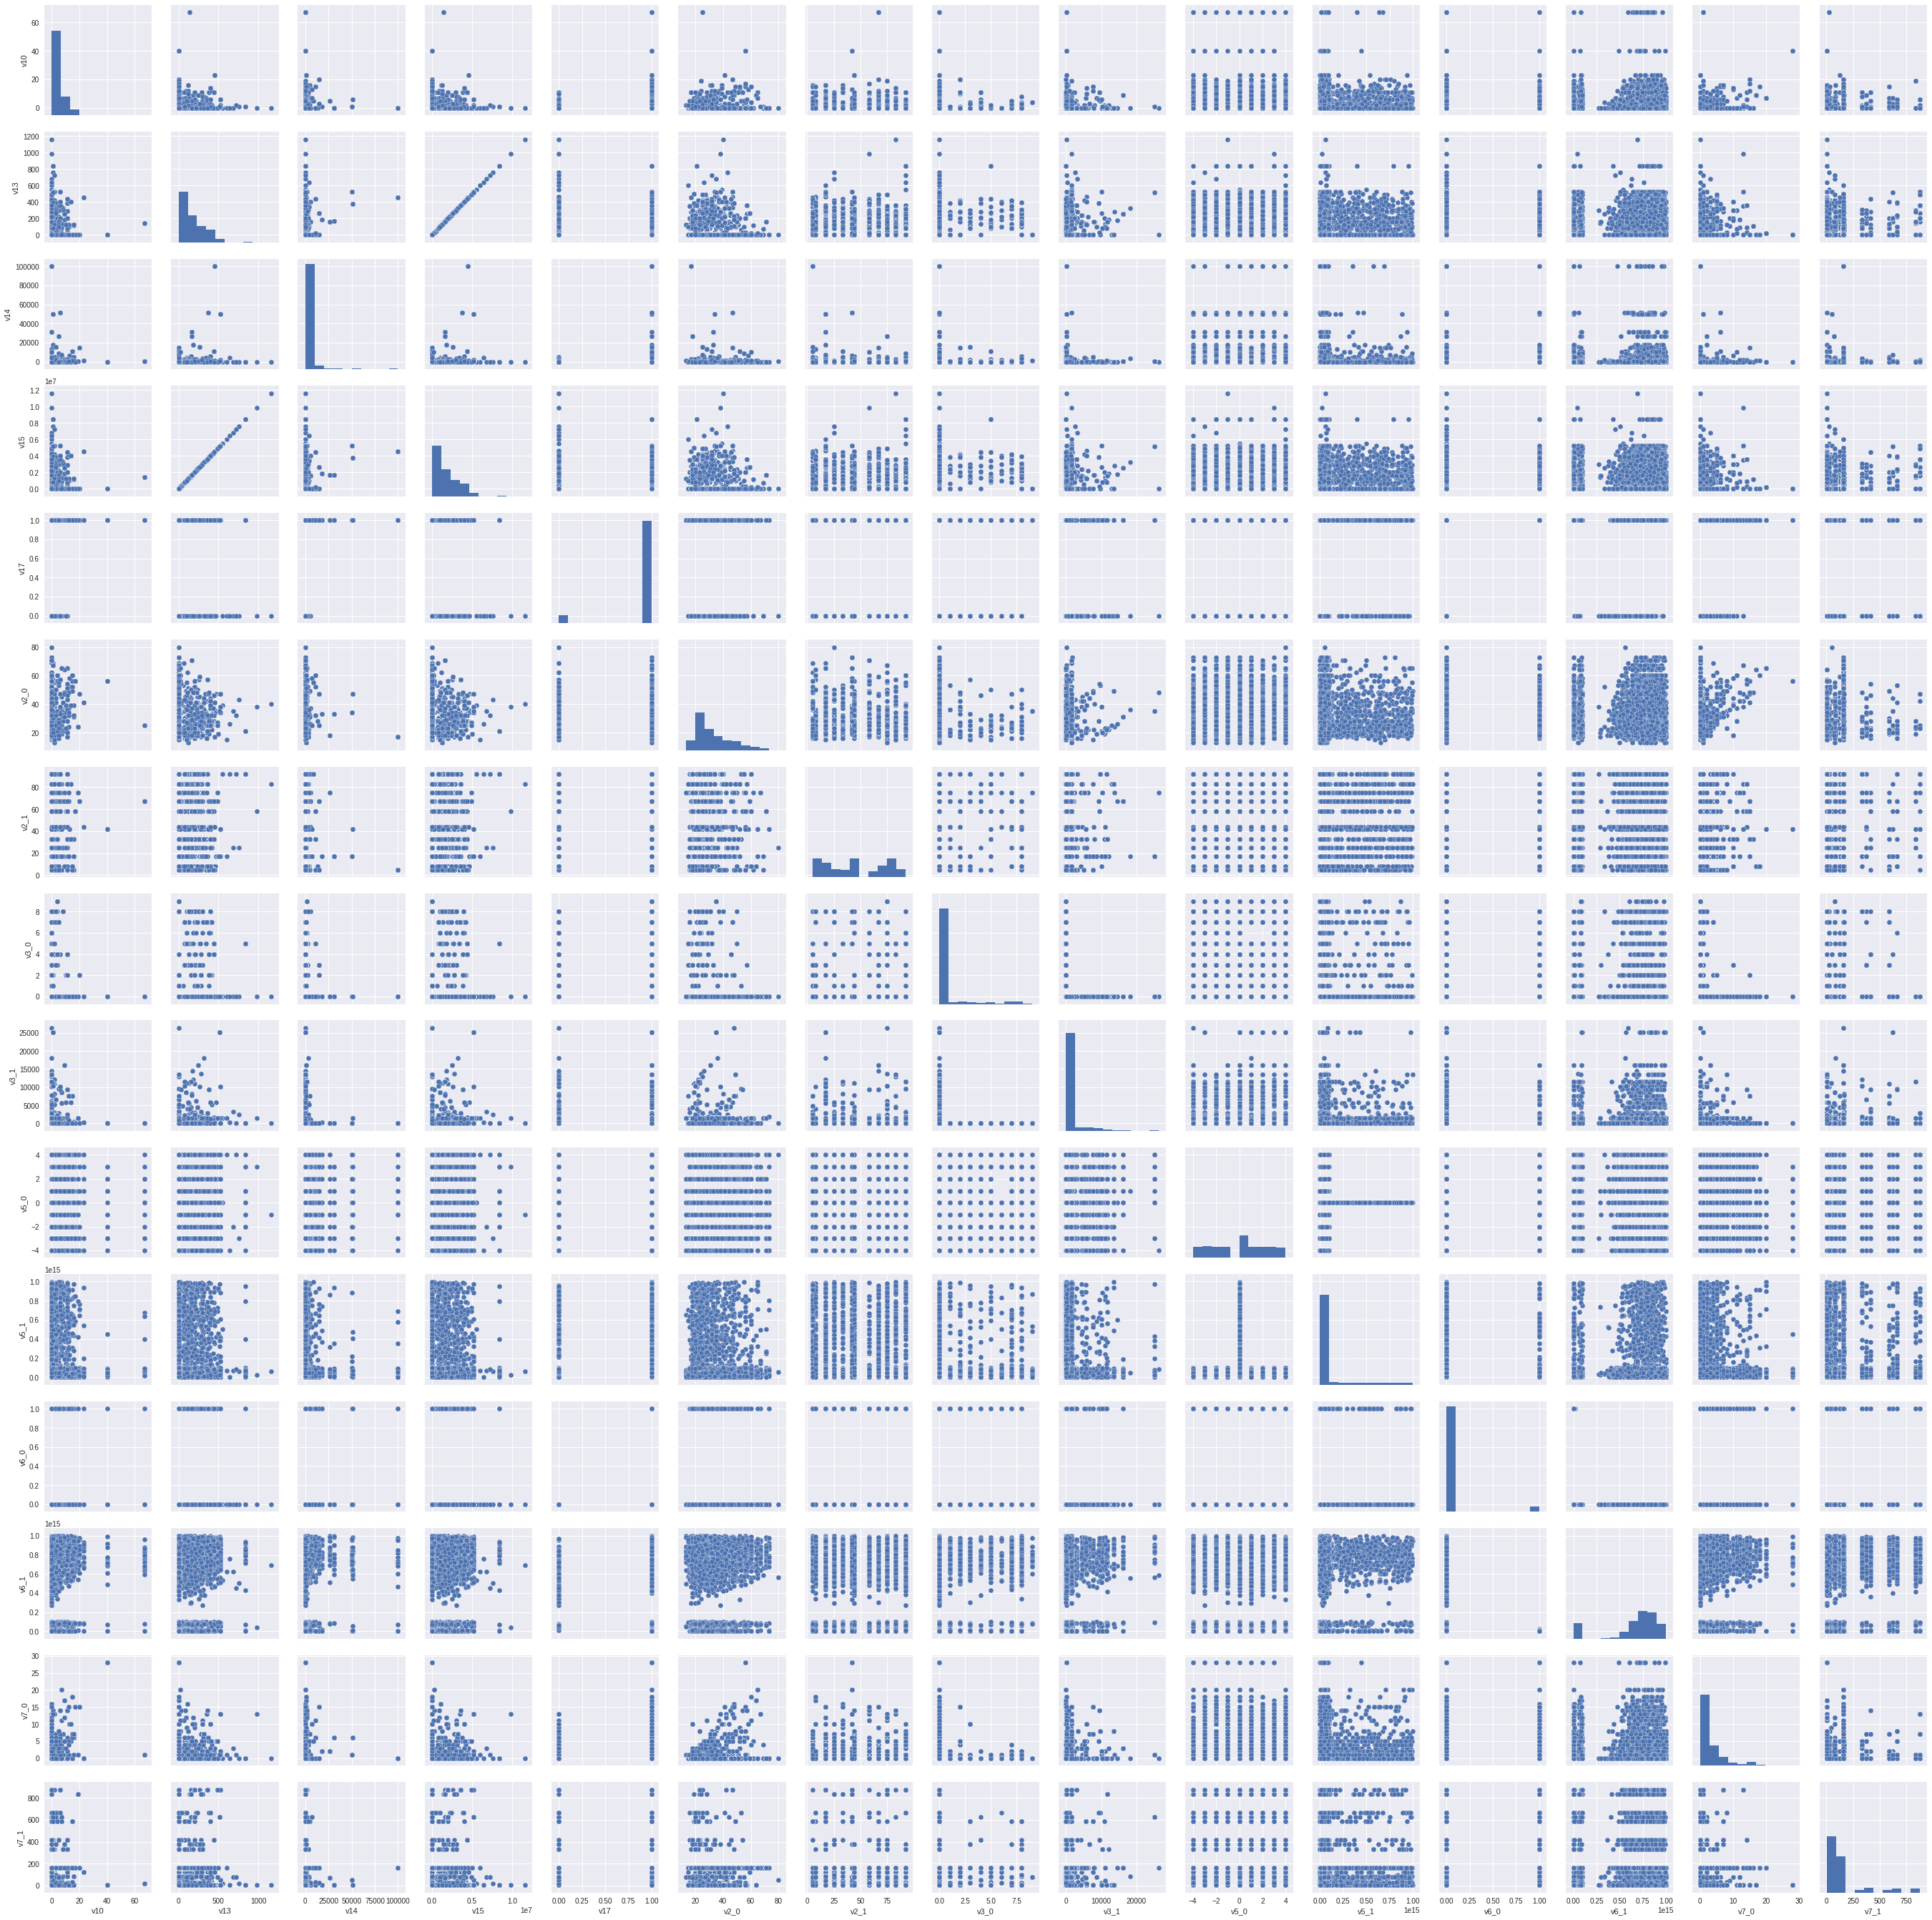

In [0]:
# Pair plot to see both distribution of single features and relationships between two features 
sns.pairplot(train.dropna())

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


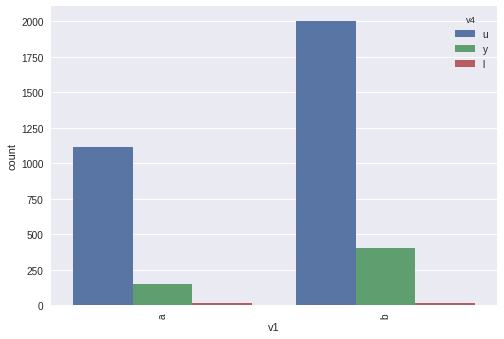

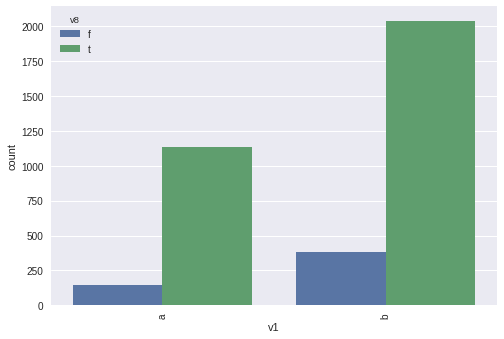

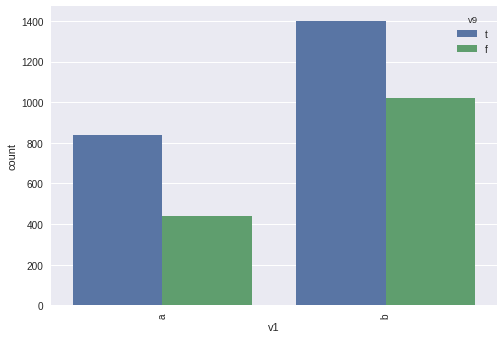

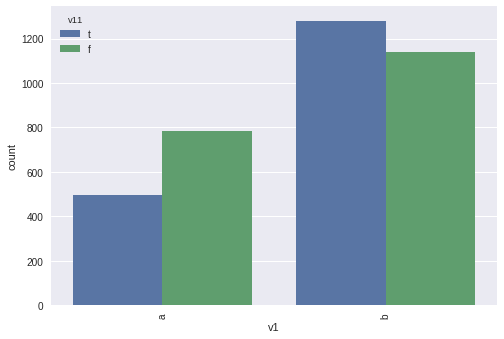

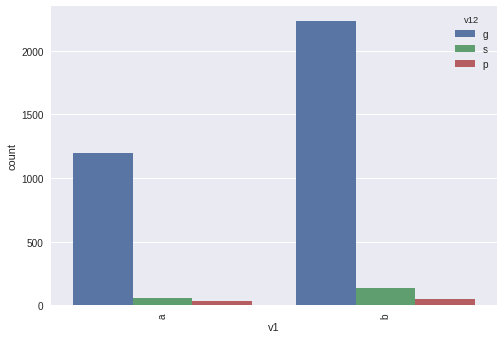

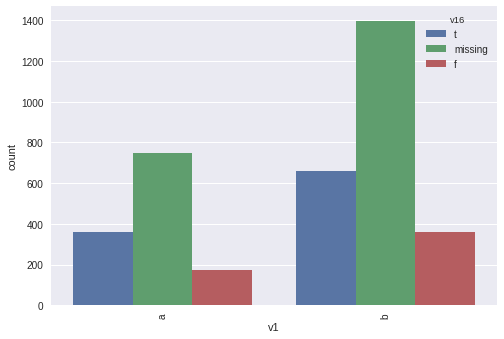

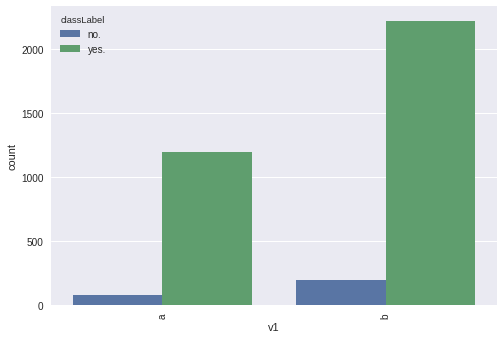

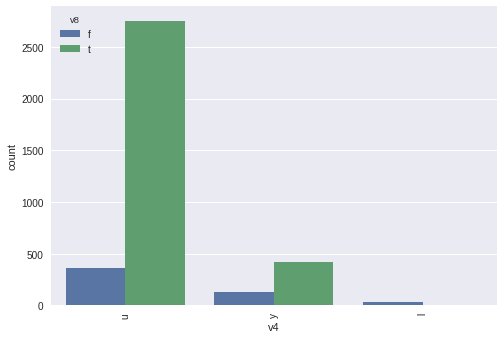

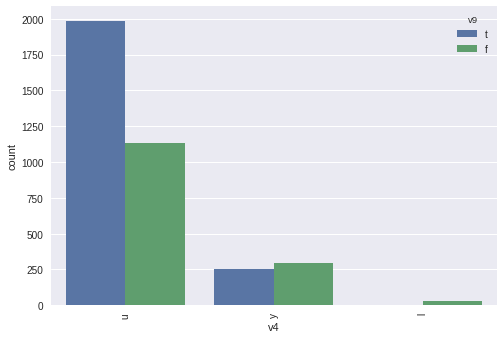

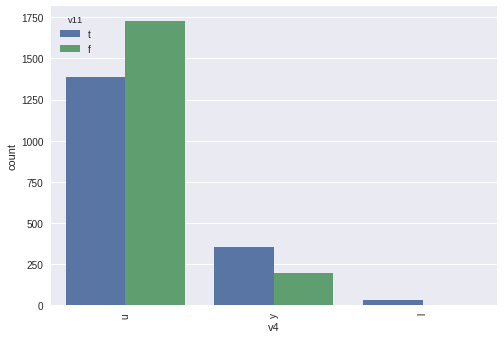

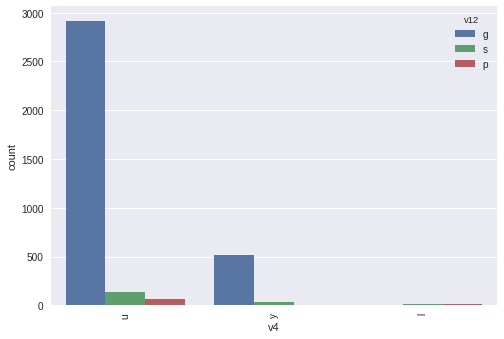

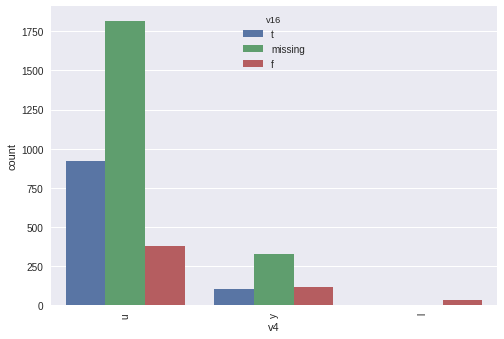

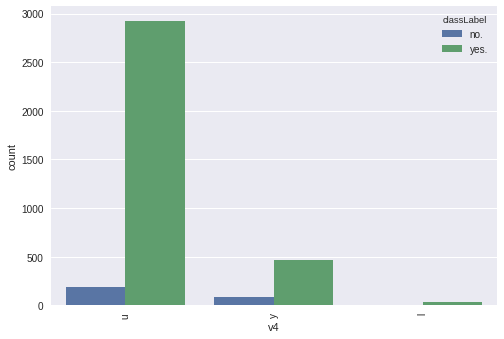

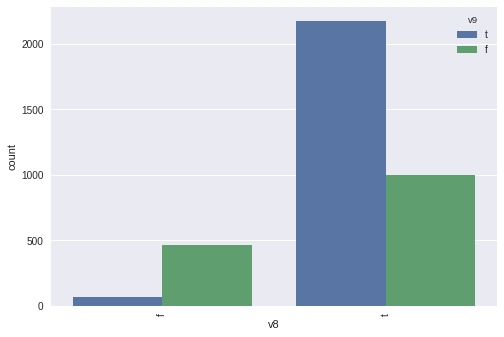

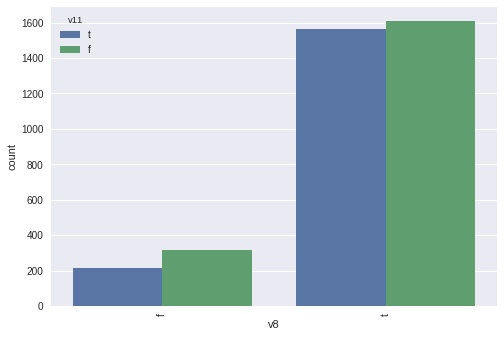

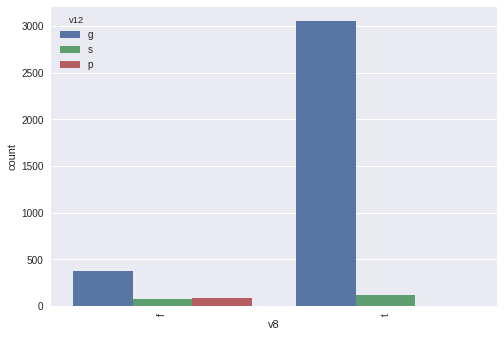

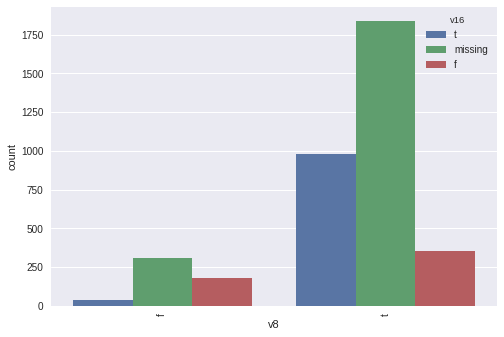

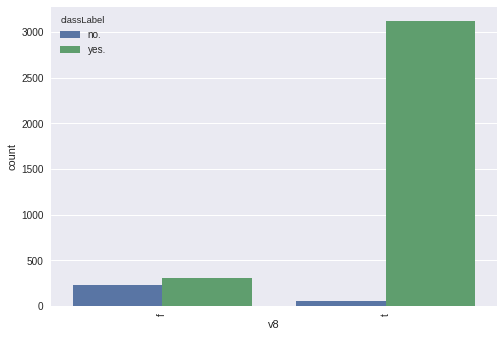

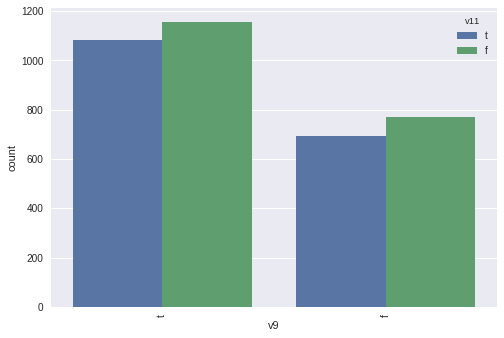

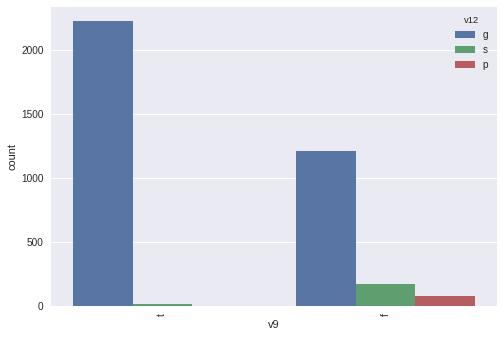

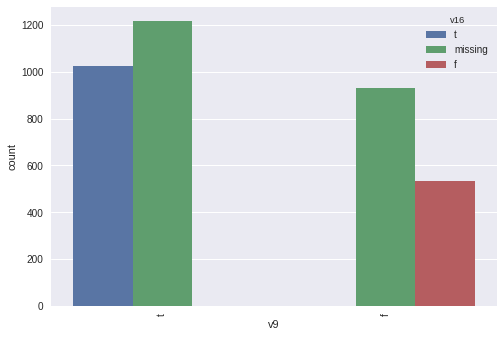

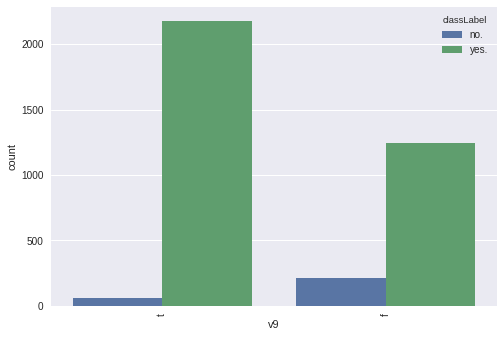

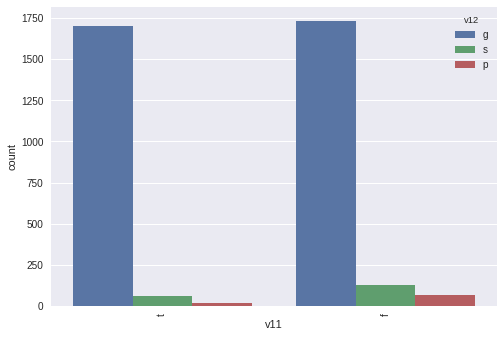

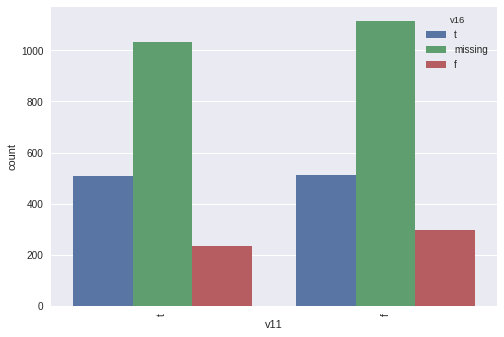

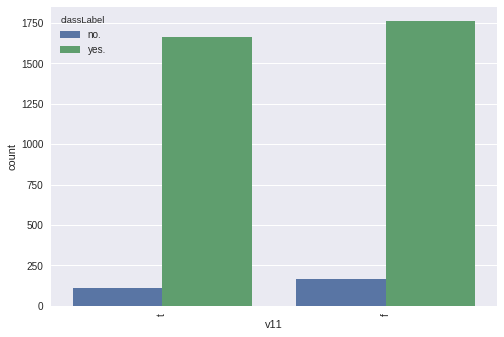

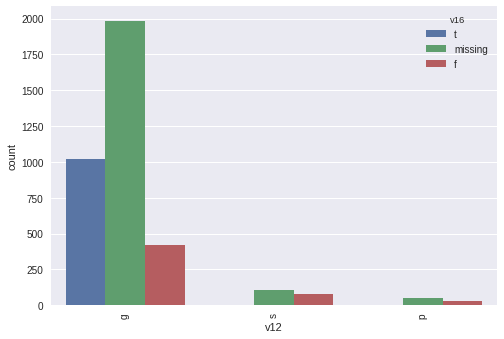

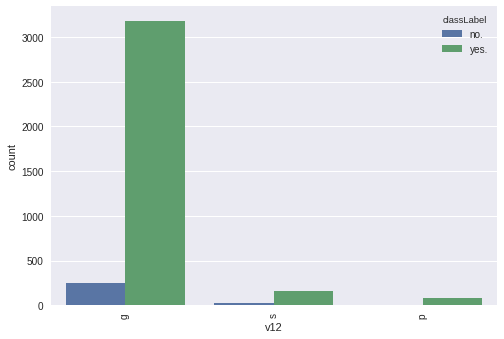

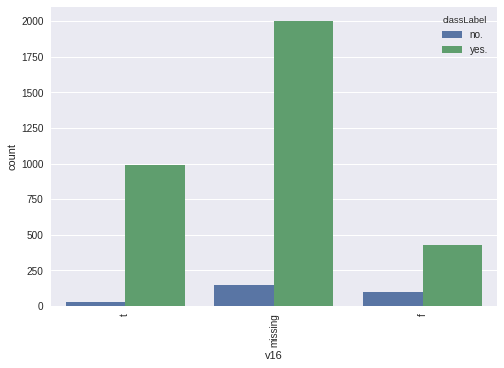

In [0]:
# Bivariate analysis
cat_Cols = train.select_dtypes(include=['object']).columns
cat_Cols_Groups = list(itertools.combinations(cat_Cols, 2))
for group in cat_Cols_Groups:
    sns.countplot(x = group[0], hue=group[1], data=train)
    plt.xticks(rotation = 90)
    plt.show()

In [0]:
#### From the bivariate analysis we can observe that most of the features shows class imbalance

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


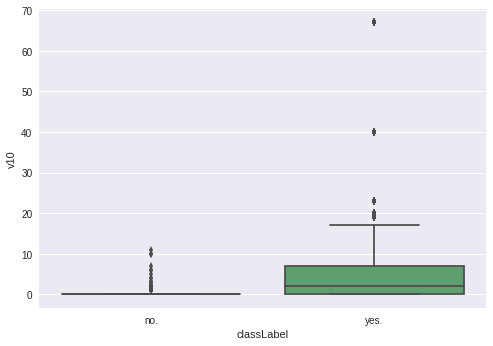

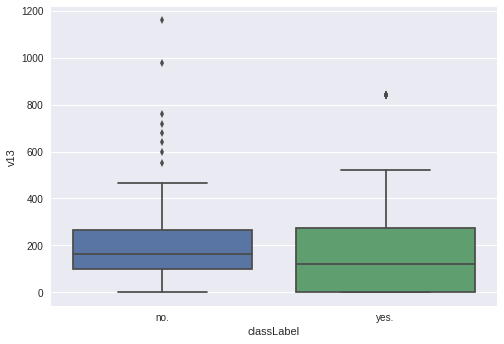

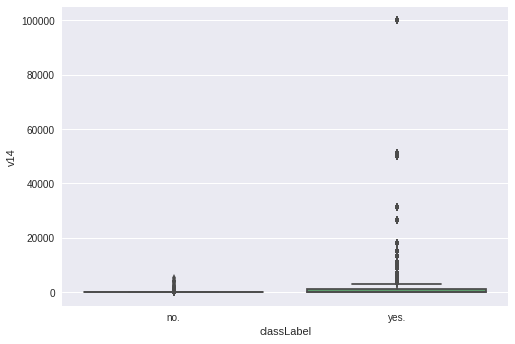

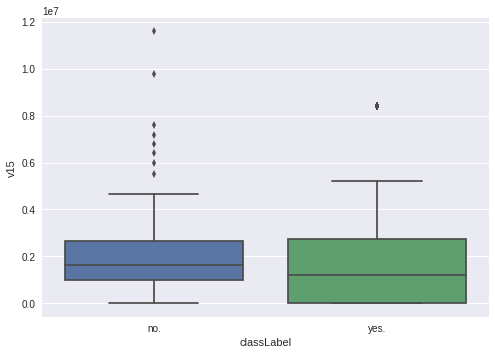

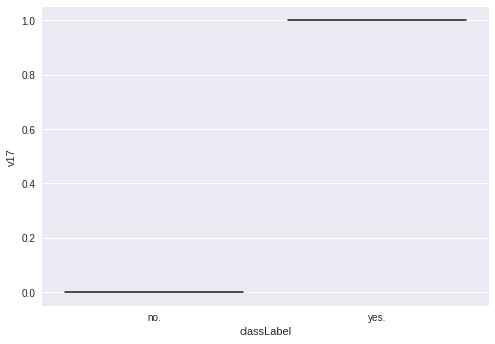

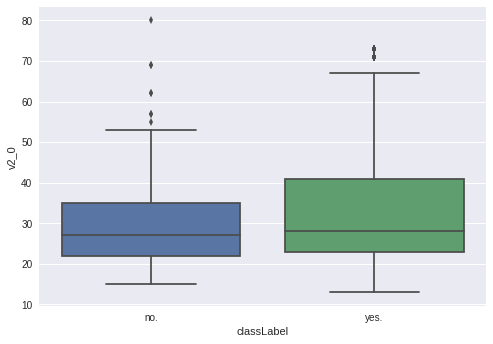

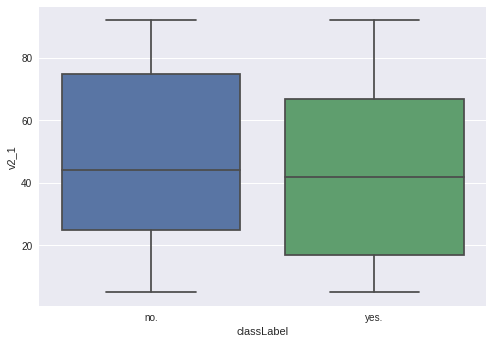

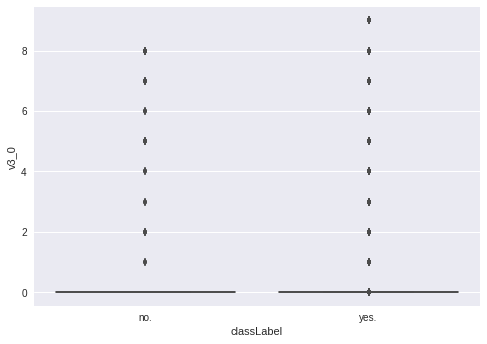

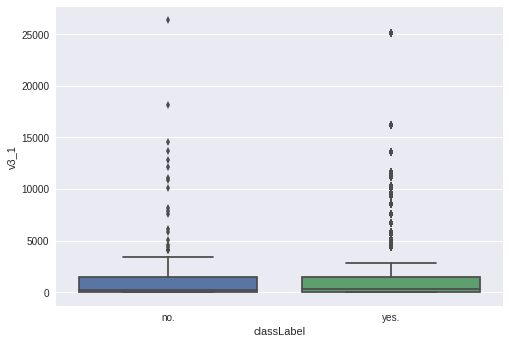

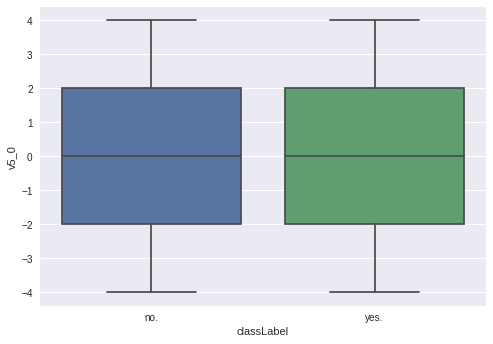

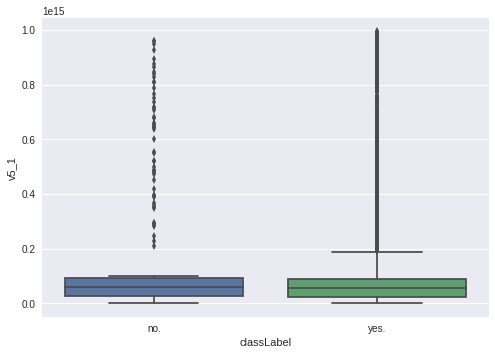

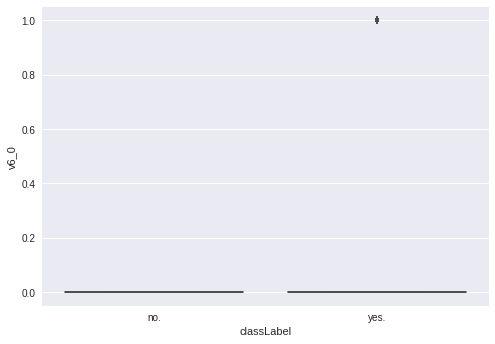

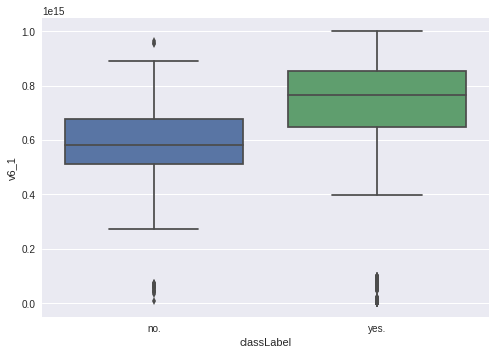

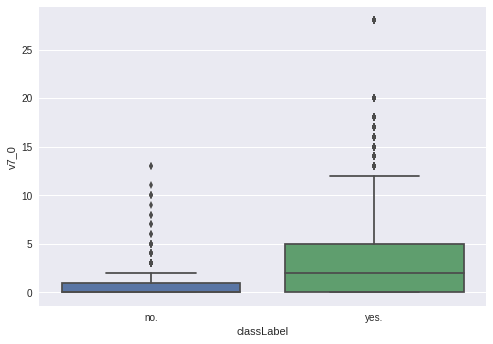

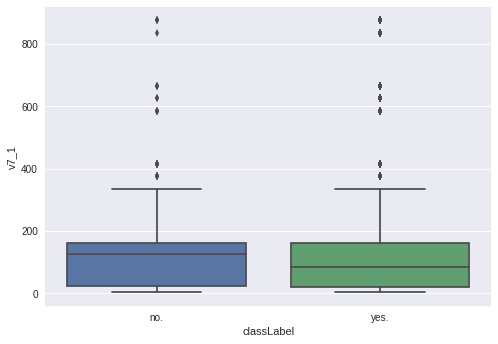

In [0]:
for column in train.select_dtypes(include=['int64','float64']).columns:
    sns.boxplot(x = 'classLabel', y= column, data = train)
    plt.show()

In [0]:
#### From the bivariate analysis we can observe that most of the features shows outliers in the data, for now i am not treating outliers.

In [0]:
# Convert categorical variables to numeric variables for training data
cols_to_transform = train.select_dtypes(include=['object']).columns
train = pd.get_dummies(columns=cols_to_transform, data=train, prefix=cols_to_transform, prefix_sep='_', drop_first=True)

In [0]:
# Convert categorical variables to numeric variables for validation data
val = pd.get_dummies(columns=cols_to_transform, data=val, prefix=cols_to_transform, prefix_sep='_', drop_first=True)

In [0]:
cols = val.columns
print(cols)

Index(['v10', 'v13', 'v14', 'v15', 'v17', 'v1_b', 'v4_y', 'v8_t', 'v9_t',
       'v11_t',
       ...
       'v7_1_54', 'v7_1_585', 'v7_1_625', 'v7_1_665', 'v7_1_75', 'v7_1_79',
       'v7_1_795', 'v7_1_835', 'v7_1_875', 'v7_1_96'],
      dtype='object', length=617)


In [0]:
cols = train.columns
print(cols)

Index(['v10', 'v13', 'v14', 'v15', 'v17', 'v1_b', 'v4_u', 'v4_y', 'v8_t',
       'v9_t',
       ...
       'v7_1_54', 'v7_1_58', 'v7_1_585', 'v7_1_625', 'v7_1_665', 'v7_1_71',
       'v7_1_75', 'v7_1_835', 'v7_1_875', 'v7_1_96'],
      dtype='object', length=7705)


In [0]:
# Validation set does not have v12_o feature
# Training set does not have v4_u feature

In [0]:
train.head()

,v10,v13,v14,v15,v17,v2_0,v2_1,v3_0,v3_1,v5_0,v5_1,v6_0,v6_1,v7_0,v7_1,v1_b,v4_u,v4_y,v8_t,v9_t,v11_t,v12_p,v12_s,v16_missing,v16_t,classLabel_yes.
0,1.0,80.0,5.0,800000.0,0.0,17.0,92.0,5.0,0.00004,-0.0,8.401820e+14,0.0,5.228826e+14,1.0,75.0,0,1,0,0,1,1,0,0,0,1,0
1,0.0,200.0,0.0,2000000.0,0.0,16.0,92.0,3.0,0.00035,-2.0,1.596351e+13,0.0,7.741871e+14,0.0,29.0,1,0,1,0,0,0,0,1,1,0,0
2,1.0,96.0,19.0,960000.0,0.0,31.0,25.0,0.0,1125.00000,1.0,7.506867e+13,0.0,7.603627e+13,0.0,161.0,1,1,0,0,1,0,0,0,0,1,0
3,0.0,0.0,120.0,0.0,0.0,48.0,17.0,0.0,1335.00000,4.0,1.748707e+13,0.0,8.889631e+14,0.0,335.0,0,1,0,0,0,0,0,0,1,0,0
4,0.0,232.0,0.0,2320000.0,0.0,32.0,33.0,0.0,35.00000,-3.0,7.854792e+13,0.0,4.890238e+14,0.0,5.0,1,1,0,0,0,1,0,0,0,0,0


In [0]:
# Splitting into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.drop(['classLabel_yes.', 'v17'],axis = 1), train['classLabel_yes.'], test_size=0.30, random_state=15)

In [0]:
# experiment

In [0]:
!pip install tpot
import tpot
X_train = X_train.astype(np.float64)

clf = tpot.TPOTClassifier(generations=10, population_size = 30, cv =5, verbosity = 3)
clf.fit(X_train, y_train)

    100% |████████████████████████████████| 901kB 18.9MB/s 
    100% |████████████████████████████████| 942kB 18.6MB/s 
  Stored in directory: /root/.cache/pip/wheels/86/5c/dd/c7673fbaccb901ec1a4eb79017fa5b65766805d2a98f954b9a
  Stored in directory: /root/.cache/pip/wheels/22/ea/bf/dc7c8a2262025a0ab5da9ef02282c198be88902791ca0c6658
  Stored in directory: /root/.cache/pip/wheels/3c/85/2b/2580190404636bfc63e8de3dff629c03bb795021e1983a6cc7
Successfully built tpot deap stopit
30 operators have been imported by TPOT.
Imputing missing values in feature set


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


Skipped pipeline #19 due to time out. Continuing to the next pipeline.
_pre_test decorator: _random_mutation_operator: num_test=0 Input X must be non-negative
_pre_test decorator: _random_mutation_operator: num_test=0 Expected n_neighbors <= n_samples,  but n_samples = 50, n_neighbors = 92
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Skipped pipeline #46 due to time out. Continuing to the next pipeline.
Skipped pipeline #53 due to time out. Continuing to the next pipeline.
Skipped pipeline #56 due to time out. Continuing to the next pipeline.


In [0]:
clf.score(X_test, y_test)

In [0]:
y_train_pred = clf.predict(X_train)

In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import matthews_corrcoef

In [0]:
# Printing the classification performance report for train data
from sklearn.metrics import classification_report
print(classification_report(y_train.values, y_train_pred))

In [0]:
matthews_corrcoef(y_train.values, y_train_pred)

In [0]:
#end of experiment

#Model Building

##Random Forest Classifer

In [0]:
# Initializing RandomForestClassifer with its hyperparameters
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_features='sqrt', class_weight='balanced_subsample', n_estimators = 150, max_depth=11)

In [0]:
# Checking the model performance with its hyper-parameters using cross validation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import matthews_corrcoef
scores = cross_val_score(rf, X_train, y_train, cv=5, scoring=make_scorer(matthews_corrcoef, greater_is_better= True))
scores

array([1., 1., 1., 1., 1.])

In [0]:
# Fitting the best RF Model

rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='gini', max_depth=11, max_features='sqrt',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=150, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [0]:
# Predciting using RF Model

y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [0]:
# Printing the classification performance report for train data
from sklearn.metrics import classification_report
print(classification_report(y_train.values, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       186
           1       1.00      1.00      1.00      2404

   micro avg       1.00      1.00      1.00      2590
   macro avg       1.00      1.00      1.00      2590
weighted avg       1.00      1.00      1.00      2590



In [0]:
# Printing the classification performance report for validation data

print(classification_report(y_test.values, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        90
           1       1.00      1.00      1.00      1020

   micro avg       1.00      1.00      1.00      1110
   macro avg       1.00      1.00      1.00      1110
weighted avg       1.00      1.00      1.00      1110



In [0]:
# Checking the MCC for RF Model for train data

matthews_corrcoef(y_train.values, y_train_pred)

1.0

In [0]:
# Checking the MCC for RF Model for validation data

matthews_corrcoef(y_test.values, y_test_pred)

1.0

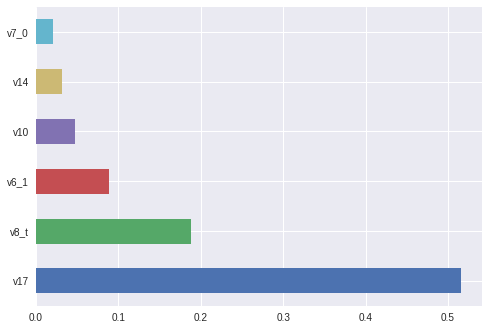

In [0]:
# Plotting the feature importance of 5 best attributes.

feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(6).plot(kind='barh')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


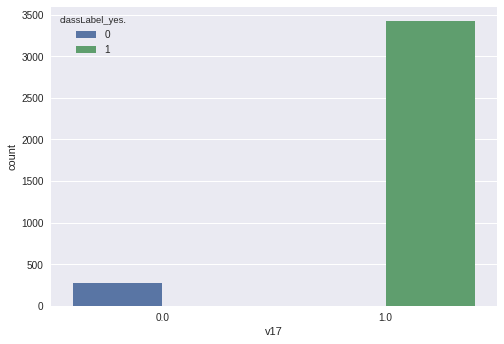

In [0]:
# Classification metrix clearly shows that there is a overfit and with feature importance we can observe that v17 is highly correlated with target varible.
# So need to drop 'v17' which is causing a data leak as shown in below plot 
# Also dropping 'v4_u' since validation set does not have this feature.
sns.countplot(x = 'v17', hue='classLabel_yes.', data=train)

In [0]:
# Initializing RandomForestClassifer with its hyperparameters
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_features='sqrt', class_weight='balanced_subsample', n_estimators = 150, max_depth=11)

In [0]:
# Checking the model performance with its hyper-parameters using cross validation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import matthews_corrcoef
scores = cross_val_score(rf, X_train.drop(['v17', 'v4_u'],axis = 1), y_train, cv=5, scoring=make_scorer(matthews_corrcoef, greater_is_better= True))
#scores = cross_val_score(rf, X_train.drop(['v17','v8'], axis = 1), y_train, cv=5, scoring=make_scorer(matthews_corrcoef, greater_is_better= True))
scores

array([0.86645918, 0.79769529, 0.82874193, 0.77805127, 0.76241319])

In [0]:
# Fitting the best RF Model

rf.fit(X_train.drop(['v17', 'v4_u'], axis = 1), y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='gini', max_depth=11, max_features='sqrt',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=150, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [0]:
# Predciting using RF Model

y_train_pred = rf.predict(X_train.drop(['v17', 'v4_u'], axis = 1))
y_test_pred = rf.predict(X_test.drop(['v17', 'v4_u'], axis = 1))

In [0]:
# Printing the classification performance report for train data
from sklearn.metrics import classification_report
print(classification_report(y_train.values, y_train_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       186
           1       1.00      1.00      1.00      2404

   micro avg       1.00      1.00      1.00      2590
   macro avg       0.98      1.00      0.99      2590
weighted avg       1.00      1.00      1.00      2590



In [0]:
# Printing the classification performance report for testing data

print(classification_report(y_test.values, y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.72      0.83        90
           1       0.98      1.00      0.99      1020

   micro avg       0.98      0.98      0.98      1110
   macro avg       0.98      0.86      0.91      1110
weighted avg       0.98      0.98      0.97      1110



In [0]:
# Checking the MCC for RF Model for train data

matthews_corrcoef(y_train.values, y_train_pred)

0.9802674972299867

In [0]:
# Checking the MCC for RF Model for training data

matthews_corrcoef(y_test.values, y_test_pred)

0.8324919260442581

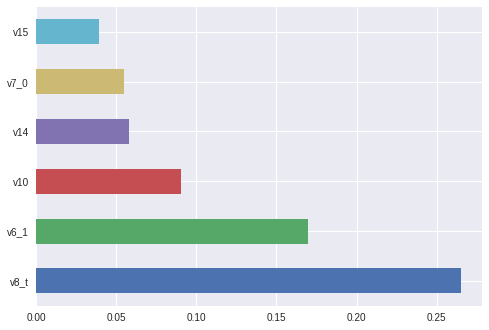

In [0]:
# Plotting the feature importance of 5 best attributes.

feat_importances = pd.Series(rf.feature_importances_, index=X_train.drop(['v17', 'v4_u'], axis = 1).columns)
feat_importances.nlargest(6).plot(kind='barh')

##Linear SVM Classifer Model

In [0]:
!pip install sklearn_pandas
# Building a pipeline with Scaler and Linear SVM Classifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn_pandas import DataFrameMapper
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC, SVC
numeric_transformer =  StandardScaler()
num_Cols = list(X_train.drop(['v17', 'v4_u'], axis = 1).select_dtypes(include=['int64','float64']).columns)
mapper = DataFrameMapper([(num_Cols, numeric_transformer)])
SVM_c = Pipeline(steps=[('Scaler', mapper),
                      ('classifier', SVC(class_weight='balanced', kernel = 'rbf'))])

In [0]:
# Fitting the Linear SVM Model

SVM_c.fit(X_train.drop(['v17', 'v4_u'], axis = 1), y_train)

Pipeline(memory=None,
     steps=[('Scaler', DataFrameMapper(default=False, df_out=False,
        features=[(['v10', 'v13', 'v14', 'v15', 'v2_0', 'v2_1', 'v3_0', 'v3_1', 'v5_0', 'v5_1', 'v6_0', 'v6_1', 'v7_0', 'v7_1'], StandardScaler(copy=True, with_mean=True, with_std=True))],
        input_df=False, sparse=False)), ('classi...f', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

In [0]:
# Predicting for train and testing data

y_train_pred = SVM_c.predict(X_train.drop(['v17', 'v4_u'], axis = 1))
y_test_pred = SVM_c.predict(X_test.drop(['v17', 'v4_u'], axis = 1))

In [0]:
# Printing the classification performance report for train data

print(classification_report(y_train.values, y_train_pred))

              precision    recall  f1-score   support

           0       0.34      0.94      0.50       186
           1       0.99      0.86      0.92      2404

   micro avg       0.86      0.86      0.86      2590
   macro avg       0.67      0.90      0.71      2590
weighted avg       0.95      0.86      0.89      2590



In [0]:
# Printing the classification performance report for testing data

print(classification_report(y_test.values, y_test_pred))

              precision    recall  f1-score   support

           0       0.28      0.76      0.41        90
           1       0.97      0.83      0.90      1020

   micro avg       0.82      0.82      0.82      1110
   macro avg       0.63      0.79      0.65      1110
weighted avg       0.92      0.82      0.86      1110



In [0]:
# Checking the MCC for SVM Model for train data

matthews_corrcoef(y_train.values, y_train_pred)

0.5151877435179857

In [0]:
# Checking the MCC for SVM Model for testing data

matthews_corrcoef(y_test.values, y_test_pred)

0.3842739149784516

##XGBoost Model

In [0]:
import xgboost as xgb
# label_column specifies the index of the column containing the true label
dtrain = xgb.DMatrix(data = X_train.drop(['v17', 'v4_u'], axis = 1), label = y_train)
dval = xgb.DMatrix(data = X_test.drop(['v17', 'v4_u'], axis = 1), label = y_test)

In [0]:
# Setting up the parameter grid for xgboost

param = {'max_depth': 6, 'eta': 0.05, 'silent': 1, 'objective': 'binary:logistic'}
param['nthread'] = 4
param['scale_pos_weight'] = (y_train.value_counts()[0]/y_train.value_counts()[1])
#param["subsample"] = 0.7

#param["min_child_weight"] = 1
#param["colsample_bytree"] = 0.7

param['eval_metric'] = 'auc'

In [0]:
# Setting up the watch-list for xgboost

evallist = [(dval, 'eval'), (dtrain, 'train')]

In [0]:
# Training the xgboost model

num_round = 150
bst = xgb.train(param, dtrain, num_round, evallist)

[0]	eval-auc:0.919635	train-auc:0.963998
[1]	eval-auc:0.91903	train-auc:0.964716
[2]	eval-auc:0.918954	train-auc:0.964747
[3]	eval-auc:0.919858	train-auc:0.965689
[4]	eval-auc:0.928992	train-auc:0.97363
[5]	eval-auc:0.931857	train-auc:0.976399
[6]	eval-auc:0.933328	train-auc:0.97709
[7]	eval-auc:0.936836	train-auc:0.980694
[8]	eval-auc:0.937598	train-auc:0.981197
[9]	eval-auc:0.937293	train-auc:0.981901
[10]	eval-auc:0.938328	train-auc:0.982657
[11]	eval-auc:0.943687	train-auc:0.983198
[12]	eval-auc:0.943802	train-auc:0.983401
[13]	eval-auc:0.943426	train-auc:0.984282
[14]	eval-auc:0.942576	train-auc:0.9858
[15]	eval-auc:0.942936	train-auc:0.986168
[16]	eval-auc:0.942816	train-auc:0.986239
[17]	eval-auc:0.945583	train-auc:0.986926
[18]	eval-auc:0.945888	train-auc:0.987163
[19]	eval-auc:0.945899	train-auc:0.987608
[20]	eval-auc:0.946089	train-auc:0.987881
[21]	eval-auc:0.94854	train-auc:0.988194
[22]	eval-auc:0.947745	train-auc:0.988391
[23]	eval-auc:0.947723	train-auc:0.988536
[24]	eva

In [0]:
# Predicting for train and testing data

y_train_pred = bst.predict(dtrain)
y_test_pred = bst.predict(dval)

In [0]:
y_train_pred  = y_train_pred > 0.5
y_train_pred = y_train_pred.astype(int)  

In [0]:
y_test_pred  = y_test_pred > 0.5
y_test_pred = y_test_pred.astype(int) 

In [0]:
# Printing the classification performance report for train data

print(classification_report(y_train.values, y_train_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       186
           1       1.00      0.99      0.99      2404

   micro avg       0.99      0.99      0.99      2590
   macro avg       0.92      0.99      0.95      2590
weighted avg       0.99      0.99      0.99      2590



In [0]:
# Printing the classification performance report for testing data

print(classification_report(y_test.values, y_test_pred))

              precision    recall  f1-score   support

           0       0.74      0.83      0.79        90
           1       0.99      0.97      0.98      1020

   micro avg       0.96      0.96      0.96      1110
   macro avg       0.86      0.90      0.88      1110
weighted avg       0.97      0.96      0.96      1110



In [0]:
# Checking the MCC of xgboost Model for train data

matthews_corrcoef(y_train.values, y_train_pred)

0.9129606791278806

In [0]:
# Checking the MCC of xgboost Model for testing data

matthews_corrcoef(y_test.values, y_test_pred)

0.7667293895200608

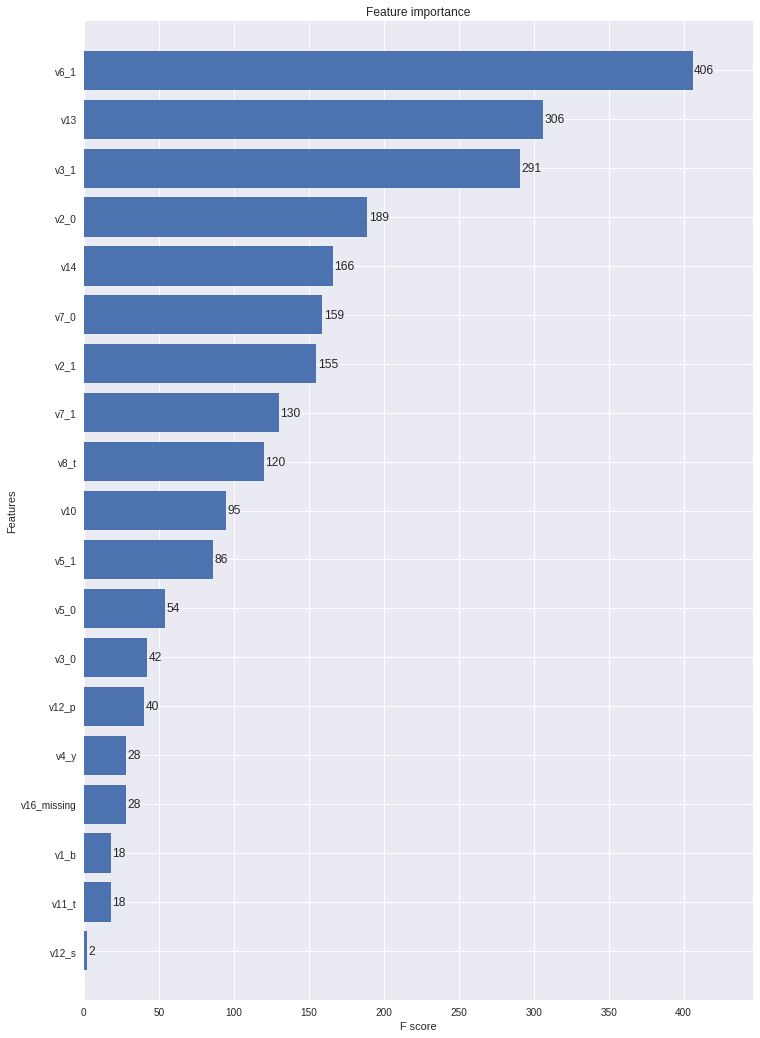

In [0]:
# Plotting the feature importance of xgboost model

fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(bst, max_num_features=50, height=0.8, ax=ax)
plt.show()

### Random Forest and xgboost seems to give high accuracy for training and testing data and it is interesting to see how they perform on validation dataset.

### Metrix for Validation data

In [0]:
# Applying xgbbost on validation data
dvalidation = xgb.DMatrix(data = val.drop(['v17', 'v12_o','classLabel_yes.'], axis = 1), label = val['classLabel_yes.'])
y_val_pred = bst.predict(dvalidation)
y_val_pred  = y_val_pred > 0.5
y_val_pred = y_val_pred.astype(int) 

In [0]:
# Printing the xgboost classification performance report for validation data
print(classification_report(val['classLabel_yes.'].values, y_val_pred))

              precision    recall  f1-score   support

           0       0.96      0.64      0.76       107
           1       0.70      0.97      0.81        93

   micro avg       0.79      0.79      0.79       200
   macro avg       0.83      0.80      0.79       200
weighted avg       0.84      0.79      0.79       200



In [0]:
# Printing the MCC for validation data
matthews_corrcoef(val['classLabel_yes.'].values, y_val_pred)

0.6287977090404839

In [0]:
# Random Forest and xgboost seems to give good performance

In [0]:
y_val_pred = rf.predict(val.drop(['v17','v12_o', 'classLabel_yes.'], axis = 1))

In [0]:
# Printing the classification performance report for validation data

print(classification_report(val['classLabel_yes.'].values, y_val_pred))

              precision    recall  f1-score   support

           0       0.97      0.28      0.43       107
           1       0.54      0.99      0.70        93

   micro avg       0.61      0.61      0.61       200
   macro avg       0.76      0.63      0.57       200
weighted avg       0.77      0.61      0.56       200



In [0]:
# Checking the MCC for Random Forest Model for validation data

matthews_corrcoef(val['classLabel_yes.'].values, y_val_pred)

0.3715892233684609

In [0]:
### Looks like RF, overfitted

In [0]:
y_val_pred = SVM_c.predict(val.drop(['v17', 'classLabel_yes.'], axis = 1))

In [0]:
# Printing the classification performance report for validation data

print(classification_report(val['classLabel_yes.'].values, y_val_pred))

              precision    recall  f1-score   support

           0       0.78      0.44      0.56       107
           1       0.57      0.86      0.69        93

   micro avg       0.64      0.64      0.64       200
   macro avg       0.68      0.65      0.62       200
weighted avg       0.68      0.64      0.62       200



In [0]:
# Checking the MCC for Linear SVM Model for validation data

matthews_corrcoef(val['classLabel_yes.'].values, y_val_pred)

0.32594420038666055

In [0]:
#Model accuracy comparison - Matthews Correlation Coefficient(MCC)

| Model | MCC for Training  |MCC for Testing | MCC for Validation   |
|------|------|------|------|
|   Random Forest  | 0.9802674972299867| 0.8324919260442581  | 0.3715892233684609|
|   XgBoost | 0.9129606791278806| 0.7667293895200608 | 0.6287977090404839|
|   SVM  | 0.5151877435179857| 0.3842739149784516   | 0.32594420038666055|

##xgboost seems to provide higher MCC with better consistency between training, test and validation data set. Thus as per objective, Xgboost is the preferred model

key observations along with a short summary / visualization has been captured separately in a presentation. 

In [0]:
#End